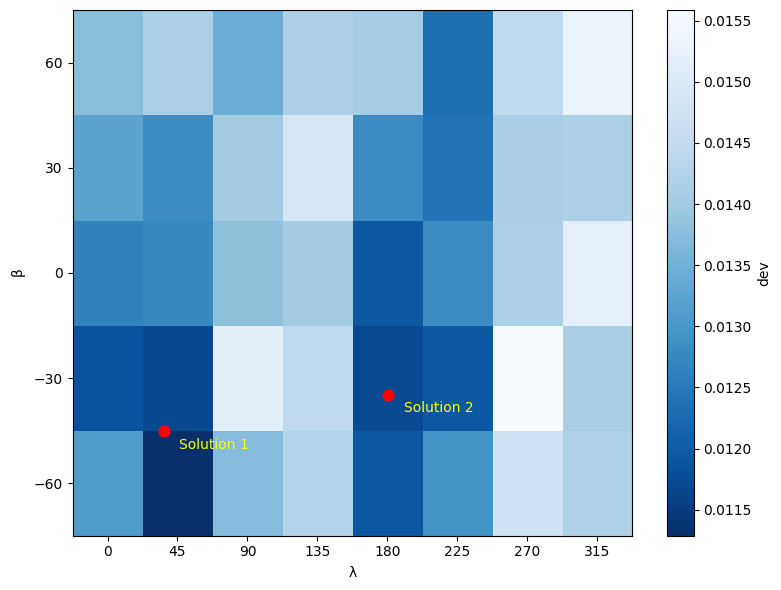

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
csv_path = "Period_scan_sphere.csv"
df = pd.read_csv(csv_path)

# Prepare grid data
lambdas = sorted(df['lambda'].unique())
betas = sorted(df['beta'].unique())

# Pivot the table to get a 2D grid of dev values
pivot = df.pivot(index='beta', columns='lambda', values='dev')

# Create the plot
plt.figure(figsize=(8, 6))
# Use a blue colormap, with min as light blue and max as deep blue
cmap = plt.cm.Blues_r  # reversed so min is light, max is dark

# Show the grid
im = plt.imshow(pivot.values, origin='lower', cmap=cmap, aspect='auto',
               extent=[min(lambdas)-22.5, max(lambdas)+22.5, min(betas)-15, max(betas)+15])

plt.colorbar(im, label='dev')
plt.xticks(lambdas)
plt.yticks(betas)
plt.xlabel(r'$\rm \lambda$')
plt.ylabel(r'$\rm \beta$')

# Plot and annotate the two red points
sol1 = (36.199822, -45.167836)
sol2 = (180.553893, -34.747492)
plt.scatter([sol1[0], sol2[0]], [sol1[1], sol2[1]], color='red', s=60, zorder=5)
plt.annotate('Solution 1', xy=sol1, xytext=(sol1[0]+10, sol1[1]-5), color='yellow', fontsize=10)
plt.annotate('Solution 2', xy=sol2, xytext=(sol2[0]+10, sol2[1]-5), color='yellow', fontsize=10)

plt.tight_layout()
plt.savefig("chi2_grid_with_solutions.pdf", dpi=600, bbox_inches='tight')